**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

## Import Necessary Files

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Add ```/path/to/your/folder``` to load the images

In [55]:
cartoon = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MAchine_Learning_LS_2024_W3/OpenCV/images/cartoon.bmp")
cartoon_y = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MAchine_Learning_LS_2024_W3/OpenCV/images/cartoon_y.jpg")
girl = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MAchine_Learning_LS_2024_W3/OpenCV/images/girl.png") #grayscale image
girl_y = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MAchine_Learning_LS_2024_W3/OpenCV/images/girl_y.jpg")
fingerprint = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MAchine_Learning_LS_2024_W3/OpenCV/images/fingerprint.jpg")
fingerprint_y = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MAchine_Learning_LS_2024_W3/OpenCV/images/fingerprint_y.jpg")

## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

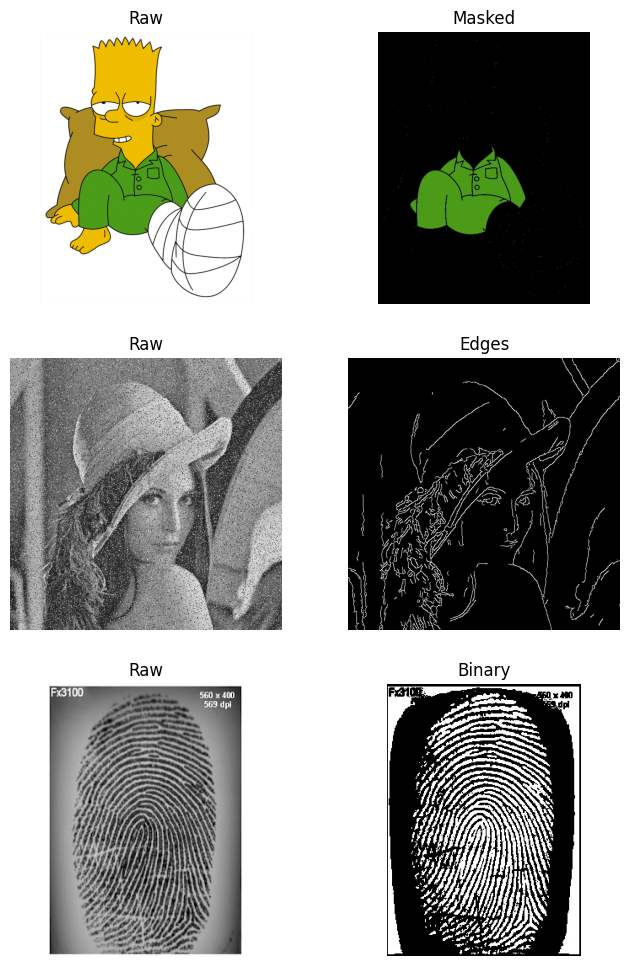

In [56]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [57]:
#START CODE HERE (Do all your processing here)
cartoon_hsv = cv2.cvtColor(cartoon, cv2.COLOR_BGR2HSV) # Converting it to HSV
                                                       # format so that masking
                                                       # can be applied
def get_limits(color): # to give us the range of shades of particular color
  img = np.uint8([[color]])
  img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  lowerlimit = img_hsv[0][0] - [13,200,130]
  upperlimit = img_hsv[0][0] + [13,0,0]

  # lowerlimit = np.array(lowerlimit, dtype= np.uint8)
  # upperlimit = np.array(upperlimit, dtype= np.uint8)

  return lowerlimit, upperlimit

green= [0,255,0] # green in BGR colorspace
lowerlimit, upperlimit = get_limits(color = green)

mask = cv2.inRange(cartoon_hsv, lowerlimit, upperlimit)
mask = mask/255
mask = np.uint8(mask)
mask = np.expand_dims(mask, axis=2) # make into a 3d array
cartoon_RGB = cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB)
cartoon_y_mentee = cartoon_RGB * mask #(in RGB format only)

#END CODE HERE (the final processed image should be cartoon_y_mentee)


# fig, axs1 = plt.subplots(1,2,figsize=(8,12))
# axs1[0].imshow(cartoon_y_mentee)
# axs1[1].imshow(cartoon_y)
# axs1[0].axis("off")
# axs1[1].axis("off")
# axs1[0].set_title("Masked_Mentee")
# axs1[1].set_title("Masked")

### Girl
For the girl image, you need to detect the edges. Write all your code in the cell below and the final image should be stored in ```girl_y_mentee``` variable only or it'll show error later.

In [58]:
#START CODE HERE (Do all your processing here)

k_size = 7
girl_denoise = cv2.medianBlur(girl, k_size)
girl_y_mentee = cv2.Canny(girl_denoise, 70, 150)

#END CODE HERE (the final processed image should be girl_y_mentee)

# fig, axs1 = plt.subplots(1,2,figsize=(8,12))
# axs1[0].imshow(girl_y_mentee)
# axs1[1].imshow(girl_y)
# axs1[0].axis("off")
# axs1[1].axis("off")
# axs1[0].set_title("Masked_Mentee")
# axs1[1].set_title("Masked")

### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [59]:
#START CODE HERE (Do all your processing here)

finger_gray = cv2.cvtColor(fingerprint, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(finger_gray, 100, 255, cv2.THRESH_BINARY)
thresh = 255 - thresh
fingerprint_y_mentee = thresh #(in Binary format only i.e. pixel intensity = 0 or 255)

#END CODE HERE (the final processed image should be fingerprint_y_mentee)

# fig, axs1 = plt.subplots(1,2,figsize=(8,12))
# axs1[0].imshow(thresh)
# axs1[1].imshow(fingerprint)
# axs1[0].axis("off")
# axs1[1].axis("off")
# axs1[0].set_title("Masked_Mentee")
# axs1[1].set_title("Masked")

## Comparison

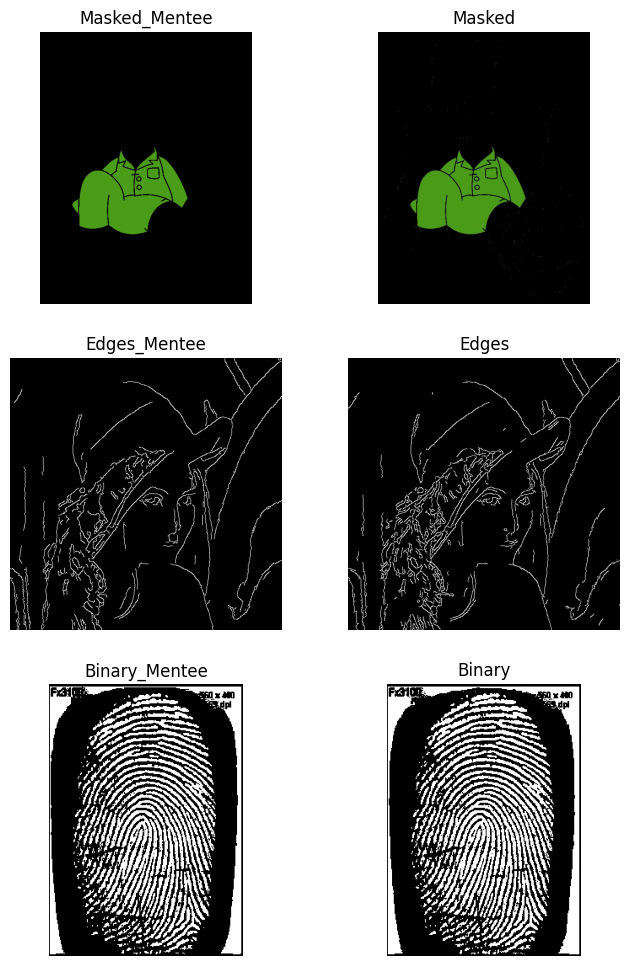

In [60]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()